## An intuitive way to understand Fourier Transform for images

We are going to try and understand what a fourier transform does to an image. I hope to make it as easy as possible to understand. What we will look at:
* Fourier transform of a 1D signal
* Output of a Fourier transform
* Interpreting and understanding the output of a Fourier Transform
* 2D Fourier Transform
* Understanding the Fourier Transform
* Understanding Phase and Magnitude in a 2D Fourier Transform

### The Frequency Domain and Fourier Transform

It is possible to decompose a signal into the frequencies that make it. We can also do this with images, if we imagine an image as a 2D signal (a kind-of composite signal made by adding multiple signals together), we can decompose this into the various signals that make it up. We do this by using the  Fourier transform. Using this, we can get the frequency, phase and magnitude of a signal. Let us try a simple 1D signal example to see what we mean.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#wave eqn
```
y(x, t) = Asin(kx - wt + O)


x = pos in x axis
t = time

A = amplitude
k = angular wave number (2*pi/ wavelength)
w(omega) = frequency (2*pi*freq)
O = phase
```

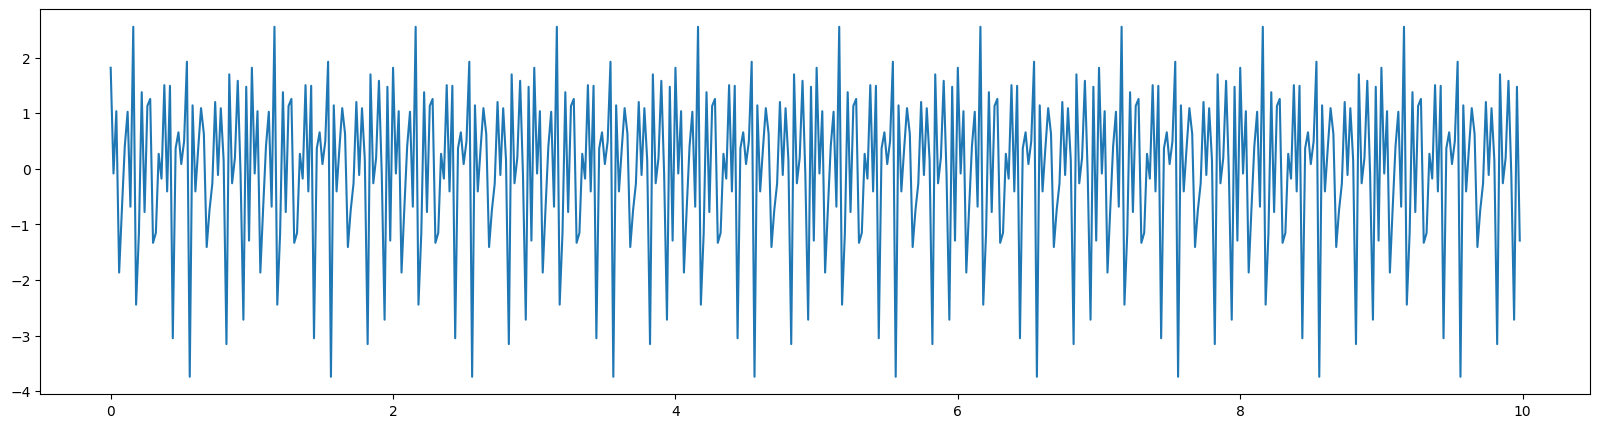

In [104]:
#Let us create a wave by adding four waves together
fig = plt.figure(figsize=[20, 5])
Ts = 1/50 #time between samples
t = np.arange(0, 10, Ts) #10 seconds... 1/Ts samples per second
x = np.sin(2*np.pi*8*t + 2*np.pi/5) + np.sin(2*np.pi*24*t + np.pi/2) + np.sin(2*np.pi*19*t + np.pi/3) + np.sin(2*np.pi*16*t + 3*np.pi/2)
plt.plot(t, x)

We have created a wave X by adding four sinusoidal waves together, each with a different phase and frequency. We can get the fourier transform of the same to reproduce the four sinusoids that we used earlier.

In [25]:
y = np.fft.fft(x) #1D fft
y_shift = np.fft.fftshift(y)
fs = 1/Ts
f = np.arange(-len(y)//2, len(y)//2) * fs/len(y) #k(index)/N(no of elements in fft) * R(sampling rate)

`f` is the range of possible frequencies in the wave X, from the lowest, to the highest, the sampling frequency, 50 samples/second. We will now plot `y_shift` which is the result of our shifted fast fourier transform. We shift the result of the fourier transform `y` so as to get the zero frequency signals at the centre. The results of the Fourier transform are arranged according to frequency, so that the lowest frequency zero is first and the highest frequency fs/2 is last. We shift in order to bring it to the centre.

In [39]:
#A plot of phase against frequency
phase_ticks = ['-$$pi$$/2', '-$$pi$$/4', '0', '$$pi$$/4', '$$pi$$/4']
phase = np.linspace(-np.pi, np.pi, len(f))

Text(0, 0.5, 'Magnitude')

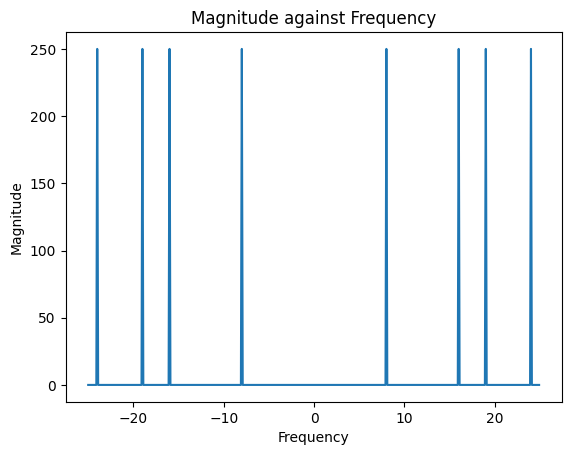

In [133]:
plt.plot(f, (abs(y_shift)))
plt.title('Magnitude against Frequency')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Phase')

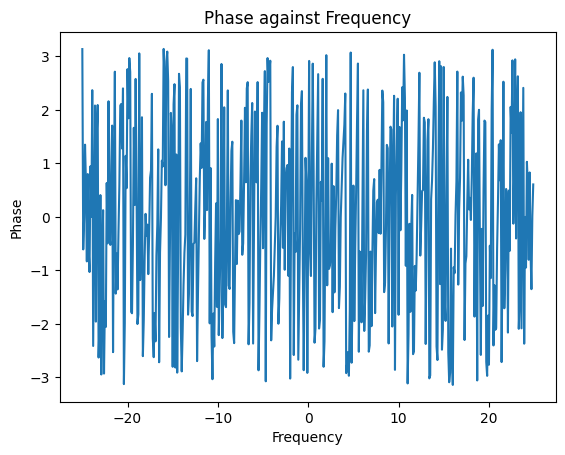

In [134]:
plt.plot(f, np.angle(y_shift))
plt.title('Phase against Frequency')
plt.xlabel('Frequency')
plt.ylabel('Phase')

The result of the fourier transform is a complex number and its complex conjugate. This is visible from the plots above. We can see in the plot for magnitude against frequency a reflection about the 0 frequency and in the plot for phase angle against frequency a reflection and rotation about 180 about the 0 frequency.

From the plot of magnitude against frequency, we see 8 peaks at 250. Since each complex number has a complex conjugate, we only consider the peaks in the positive frequency range. The peaks show us the waves that make up the original wave X. We can do an inverse fourier transform to get back the original wave. We can also modify the results of the fourier transform to get a different output.

## What of Images?

Just as we have done with the wave above, we can imagine an image as a wave made by combining many individual waves together. Unlike the X wave we have created above, which is in 1D, images are in 2D. We will use numpy's 2D fft to do an FFT on an image. A 2D fft is similar to a 1D fft along the column and another 1D fft on the result along the rows.

In [109]:
#read an image
python = cv2.imread('images/python.bmp', cv2.IMREAD_GRAYSCALE)

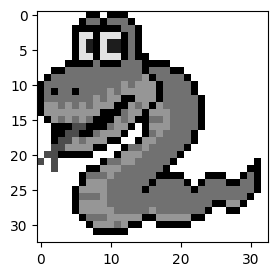

In [112]:
plt.figure(figsize=[3, 3])
plt.imshow(python, cmap='gray')

We will use numpy's `np.fft.fft2(python)` to perform the 2D FFT. This operation is similar to `np.fft.fft(np.fft.fft(python, axis=1), axis=0)` as we noted earlier.

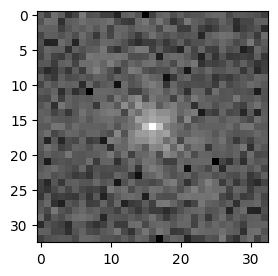

In [114]:
python_fft = np.fft.fft2(python)

#we shift the result to bring the zero frequencies to the centre
python_fft_shift = np.fft.fftshift(python_fft)

#we then plot
plt.figure(figsize=[3, 3])
plt.imshow(np.log(abs(python_fft_shift) + 1), cmap='gray')

The image above may not look like much, however, recall that we shifted the result of the fft so that the low frequency components can be shifted to the centre and the high frequency components can be moved to the edge. Also, remember we said that we can modify the output of the fft and before doing an inverse fft to get back our original image. With all this in mind, it turns out that we can do with the Fourier Transform what we would normally do with convolutions. For example, masking the centre of the image above leaves only the high level frequencies and masks the low-level ones. An IFFT on the result leaves a sharp version of the image. The inverse - masking out the outer portions and leaving the inner ones - discards the high frequencies and an IFFT returns a blurred image.

## Magnitude and Phase

Let's discuss a little bit about the output of the Fourier Transform. To recap: we have seen from our first example, that we map a signal from the time domain into the frequency domain using the Fourier Transform. We have also plotted graphs of magnitude and phase against frequency. To understand the output of the Fourier Transform, it helps if we look at it.

In [121]:
#let us have a snippet of the X wave
print(y[0])
#a snippet of the image also
print(python_fft[0, 0])

(1.9682033780554775e-12+0j)
(182659+0j)


We see that the output from both is a complex number. (Also, of interest is that, since we chose the very first indices of both the X wave and the image, these also happen to have a frequency of 0. We can easily verify this by taking the value of the centermost element in the shifted arrays of both `y` and `python_fft`).

Since the result of the Fourier Transform is a complex number, the magnitude is the [complex modulus](https://mathworld.wolfram.com/ComplexModulus.html) and the phase angle is the [complex argument](https://mathworld.wolfram.com/ComplexArgument.html). At each frequency, we get the magnitude (strength relative to the other sinusoids) and the phase (timing of each sinusoid) of the individual signals that make up the original sinusoids.

## What if we change the Magnitude and Phase

A natural question arises: what if at each frequency we change the magnitude and the phase angle. Which change has the most effect on the resultant signal? It is easy to see this on an image. In the other post, we will answer this question.